In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


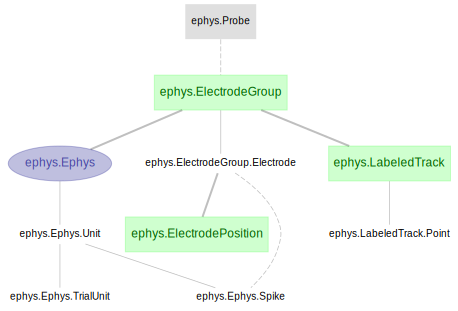

In [3]:
dj.ERD(ephys)

In [4]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

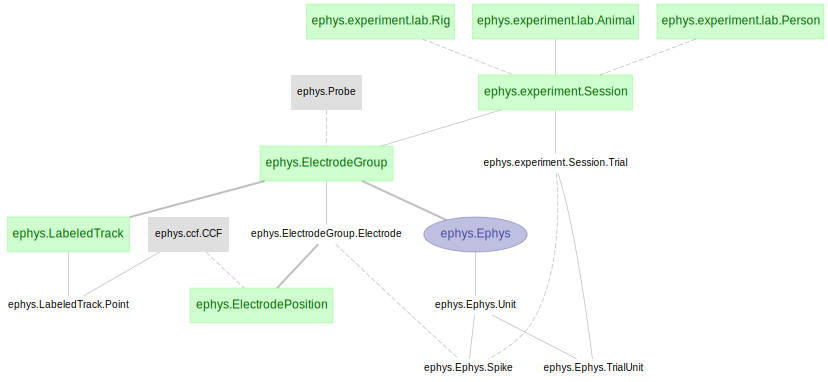

In [5]:
dj.ERD(ephys)-2

In [6]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
399752,2017-08-01
400483,2017-08-01


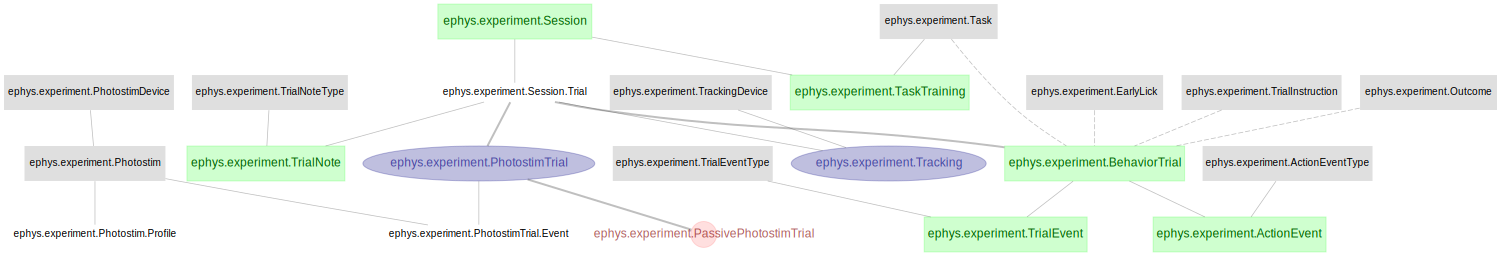

In [7]:
dj.ERD(ephys.experiment)

In [8]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig
123456,1,2017-10-21,daveliu,RRig
399752,1,2017-11-14,daveliu,TRig1
399752,2,2017-11-16,daveliu,TRig1
399752,3,2017-11-22,daveliu,TRig1
399752,4,2017-11-23,daveliu,TRig1
399752,5,2017-11-24,daveliu,TRig1
399752,6,2017-11-26,daveliu,TRig1


In [9]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


In [10]:
ephys.Probe()

probe_part_no,probe_description
15131808323,neuropixels probe O3


In [11]:
eGroup=ephys.ElectrodeGroup()

In [12]:
#eGroup.insert1((123456, 1, 1, '15131808323', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [13]:
eIns=eGroup.fetch1(dj.key) # fetch the dictionary
electrode=eGroup.Electrode()

In [14]:
electrode

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,electrode sites on the electrode
123456,1,1,1
123456,1,1,2
123456,1,1,3
123456,1,1,4
123456,1,1,5
123456,1,1,6
123456,1,1,7


In [15]:
import h5py
root="C:\\Users\\liul.HHMI\\Desktop\\"
data_file = root + 'real5ap_imec3_opt3_jrc.mat'

In [17]:
f = h5py.File(data_file,'r')
ind = np.argsort(f['S_clu']['viClu'][0]) # index sorted by cluster
cluster_ids = f['S_clu']['viClu'][0][ind] # cluster (unit) number
spike_times = f['viTime_spk'][0][ind] # spike times
viSite_spk = f['viSite_spk'][0][ind]
viT_offset_file = f['viT_offset_file'][:] # start of each trial
spike_trials = np.ones(len(spike_times)) * len(viT_offset_file)
for i in range(len(viT_offset_file) - 1, 0, -1):
    spike_trials[np.where(spike_times < viT_offset_file[i])] = i
sRateHz = f['P']['sRateHz'][0]
clu_ids_diff = np.diff(cluster_ids)
clu_ids_diff = np.where(clu_ids_diff != 0)[0] + 1
units = np.split(spike_times, clu_ids_diff)
trialunits = np.split(spike_trials, clu_ids_diff) # sub arrays of spike_trials
unit_ids = np.arange(len(clu_ids_diff)+1)
trialunits1=[]
trialunits2=[]
for i in range(0,len(trialunits)):
    trialunits2 = np.append(trialunits2, np.unique(trialunits[i]))
    trialunits1 = np.append(trialunits1, np.zeros(len(np.unique(trialunits[i]))) + i)

In [18]:
list(dict(unit = trialunits1[x], trial = trialunits2[x]) for x in range(0, len(trialunits2)))

[{'trial': 1.0, 'unit': 0.0},
 {'trial': 2.0, 'unit': 0.0},
 {'trial': 3.0, 'unit': 0.0},
 {'trial': 4.0, 'unit': 0.0},
 {'trial': 5.0, 'unit': 0.0},
 {'trial': 6.0, 'unit': 0.0},
 {'trial': 7.0, 'unit': 0.0},
 {'trial': 8.0, 'unit': 0.0},
 {'trial': 9.0, 'unit': 0.0},
 {'trial': 10.0, 'unit': 0.0},
 {'trial': 11.0, 'unit': 0.0},
 {'trial': 12.0, 'unit': 0.0},
 {'trial': 13.0, 'unit': 0.0},
 {'trial': 14.0, 'unit': 0.0},
 {'trial': 15.0, 'unit': 0.0},
 {'trial': 16.0, 'unit': 0.0},
 {'trial': 17.0, 'unit': 0.0},
 {'trial': 18.0, 'unit': 0.0},
 {'trial': 19.0, 'unit': 0.0},
 {'trial': 20.0, 'unit': 0.0},
 {'trial': 21.0, 'unit': 0.0},
 {'trial': 22.0, 'unit': 0.0},
 {'trial': 23.0, 'unit': 0.0},
 {'trial': 24.0, 'unit': 0.0},
 {'trial': 25.0, 'unit': 0.0},
 {'trial': 26.0, 'unit': 0.0},
 {'trial': 27.0, 'unit': 0.0},
 {'trial': 28.0, 'unit': 0.0},
 {'trial': 29.0, 'unit': 0.0},
 {'trial': 30.0, 'unit': 0.0},
 {'trial': 31.0, 'unit': 0.0},
 {'trial': 32.0, 'unit': 0.0},
 {'trial': 33.0, 

In [31]:
list(dict(unit = x, spike_time = spike_times[x], electrode = viSite_spk[x], trial = spike_trials[x]) for x in cluster_ids)

[{'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0},
 {'ele

In [43]:
a[20000]

{'electrode': 86, 'spike_time': 55033139, 'trial': 359.0, 'unit': 0}

In [ ]:
list(zip((0,1),(0,1)))

In [ ]:
list((x, units[x]/sRateHz) for x in unit_ids) # memory issue if too big

In [ ]:
ephys1=ephys.Ephys()

In [ ]:
#ephys1.populate()

In [ ]:
ephys1.Spike()

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [44]:
ephys.experiment.ActionEvent()

animal Janelia ANM ID (6 digits),session session number,trial,action_event_type,action_event_time (s) from trial or session (it depends but please figure it out)
123456,1,0,left lick,4.5963
123456,1,0,left lick,4.7489
123456,1,0,left lick,5.2532
123456,1,0,left lick,5.4285
123456,1,0,right lick,4.7286
123456,1,0,right lick,4.8735
123456,1,0,right lick,5.3707
